In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import linear_model as lm

pd.set_option('display.max_columns', None)

# Default plot configurations
%matplotlib inline
plt.rcParams['figure.figsize'] = (16,8)
plt.rcParams['figure.dpi'] = 150
sns.set()

In [3]:
data = pd.read_table('data.tsv')

In [4]:
data = data.drop(['Search Parameters'], axis=1)
data = data.drop(index=0, axis=0)

In [5]:
print(data.shape)
data.head(100)

(6351, 38)


,Year,Mo,Dy,Hr,Mn,Sec,Tsu,Vol,Location Name,Latitude,Longitude,Focal Depth (km),Mag,MMI Int,Deaths,Death Description,Missing,Missing Description,Injuries,Injuries Description,Damage ($Mil),Damage Description,Houses Destroyed,Houses Destroyed Description,Houses Damaged,Houses Damaged Description,Total Deaths,Total Death Description,Total Missing,Total Missing Description,Total Injuries,Total Injuries Description,Total Damage ($Mil),Total Damage Description,Total Houses Destroyed,Total Houses Destroyed Description,Total Houses Damaged,Total Houses Damaged Description
1,-2150.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,"JORDAN: BAB-A-DARAA,AL-KARAK",31.100,35.5,NaN,7.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,-2000.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,SYRIA: UGARIT,35.683,35.8,NaN,NaN,10.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,-2000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TURKMENISTAN: W,38.000,58.2,18.0,7.1,10.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN
4,-1610.0,NaN,NaN,NaN,NaN,NaN,3.0,1351.0,GREECE: THERA ISLAND (SANTORINI),36.400,25.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN
5,-1566.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,ISRAEL: ARIHA (JERICHO),31.500,35.3,NaN,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,294.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,CHINA: BEIJING,40.300,116.0,NaN,5.5,7.0,101.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,101.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
97,304.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,SOUTH KOREA: KYONGJU,35.500,129.1,NaN,6.3,8.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,2.0,NaN,2.0,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,2.0,NaN,2.0,NaN,NaN
98,306.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,"LEBANON: SUR (TYRE), SAYDA (SAIDA)",33.200,35.1,NaN,NaN,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99,315.0,NaN,NaN,NaN,NaN,NaN,32.0,NaN,ISRAEL: AEROPOLIS,31.700,35.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN


In [6]:
nan_counts = data.isna().mean()*100

print(nan_counts)

Year                                   0.000000
Mo                                     6.439931
Dy                                     8.911982
Hr                                    32.278381
Mn                                    35.490474
Sec                                   31.522595
Tsu                                   69.122973
Vol                                   98.787593
Location Name                          0.015746
Latitude                               0.818769
Longitude                              0.818769
Focal Depth (km)                      46.717052
Mag                                   27.964100
MMI Int                               51.739883
Deaths                                66.430483
Death Description                     58.809636
Missing                               99.606361
Missing Description                   99.606361
Injuries                              78.712014
Injuries Description                  75.185010
Damage ($Mil)                         91

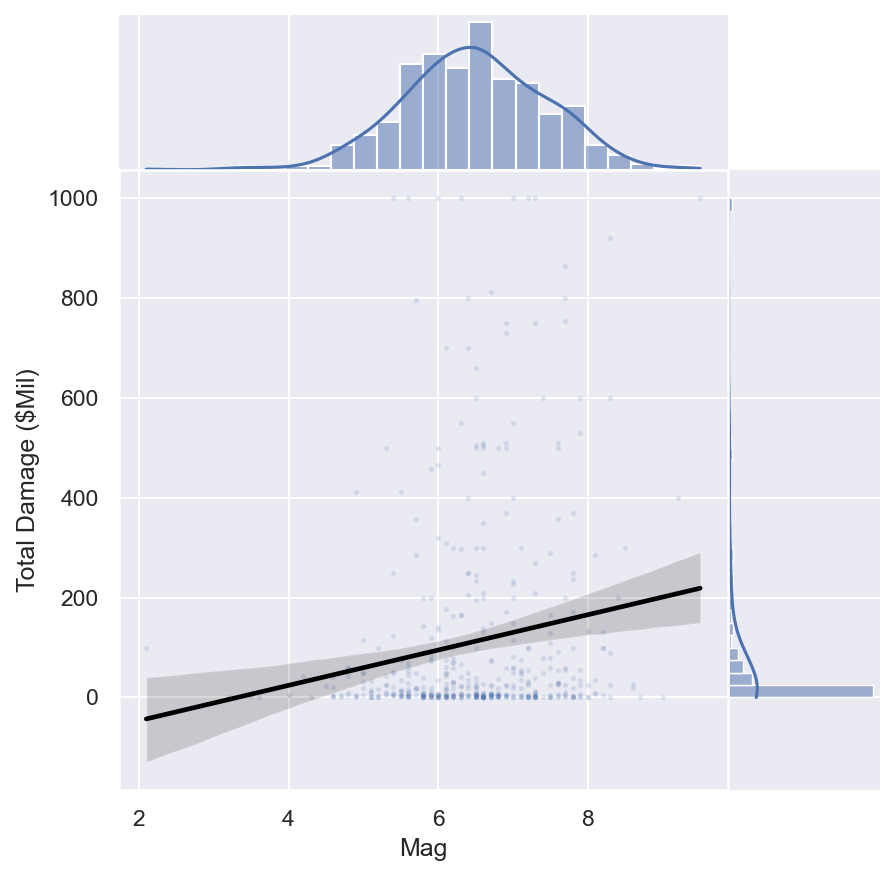

In [14]:
d_temp = data.loc[data['Total Damage ($Mil)'] <= 1000]

sns.jointplot(
    x='Mag', 
    y='Total Damage ($Mil)', 
    data=d_temp,
    kind="reg",
    ratio=4,
    space=0,
    scatter_kws={
        's': 3,
        'alpha': 0.1
    },
    line_kws={
        'color': 'black'
    }
)

In [87]:
data_dropna = data.copy()
data_dropna.dropna(subset=['Year',
              'Mo',
              'Dy',
              'Hr',
              'Latitude',
              'Longitude',
              'Focal Depth (km)',
              'Mag',
              'Deaths'], inplace=True)
print(data_dropna.shape)
data_dropna.head()

(1345, 38)


,Year,Mo,Dy,Hr,Mn,Sec,Tsu,Vol,Location Name,Latitude,Longitude,Focal Depth (km),Mag,MMI Int,Deaths,Death Description,Missing,Missing Description,Injuries,Injuries Description,Damage ($Mil),Damage Description,Houses Destroyed,Houses Destroyed Description,Houses Damaged,Houses Damaged Description,Total Deaths,Total Death Description,Total Missing,Total Missing Description,Total Injuries,Total Injuries Description,Total Damage ($Mil),Total Damage Description,Total Houses Destroyed,Total Houses Destroyed Description,Total Houses Damaged,Total Houses Damaged Description
307,1042.0,11.0,4.0,13.0,30.0,NaN,NaN,NaN,IRAN: TABRIZ,38.100,46.300,15.0,7.6,9.0,50000.0,4.0,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,50000.0,4.0,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN
630,1511.0,3.0,26.0,14.0,30.0,NaN,157.0,NaN,"BALKANS NW: SLOVENIA: IDRIJA,SKOFJA LOKA",46.200,13.433,7.0,6.5,10.0,15.0,1.0,NaN,NaN,NaN,NaN,NaN,3.0,NaN,3.0,NaN,NaN,15.0,1.0,NaN,NaN,NaN,NaN,NaN,3.0,NaN,3.0,NaN,NaN
737,1586.0,7.0,10.0,0.0,30.0,NaN,194.0,NaN,PERU: LIMA,-12.300,-77.700,60.0,8.5,10.0,22.0,1.0,NaN,NaN,NaN,NaN,NaN,3.0,NaN,3.0,NaN,NaN,22.0,1.0,NaN,NaN,NaN,NaN,NaN,3.0,NaN,3.0,NaN,NaN
770,1604.0,11.0,24.0,18.0,30.0,NaN,212.0,NaN,PERU: AREQUIPA; CHILE: ARICA,-17.880,-70.940,30.0,8.5,11.0,100.0,2.0,NaN,NaN,NaN,NaN,NaN,3.0,NaN,3.0,NaN,NaN,174.0,3.0,NaN,NaN,NaN,NaN,NaN,3.0,NaN,3.0,NaN,NaN
817,1619.0,2.0,14.0,16.0,30.0,NaN,NaN,NaN,"PERU: TRUJILLO, PIURA, SANTA",-7.941,-79.038,40.0,8.6,9.0,350.0,3.0,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,350.0,3.0,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN


In [88]:
data_n = remove_outliers(data_dropna, 'Year', lower=1960)
print(data_n.shape)
#cols_with_nan = data_n.isna().any()

#print(cols_with_nan)

(1083, 38)


In [439]:
def remove_outliers(data, variable, lower=-np.inf, upper=np.inf):
    """
    Input:
      data (data frame): the table to be filtered
      variable (string): the column with numerical outliers
      lower (numeric): observations with values lower than this will be removed
      upper (numeric): observations with values higher than this will be removed
    
    Output:
      a winsorized data frame with outliers removed
    """
    return data.loc[(data[variable] > lower) & (data[variable] < upper)]

In [440]:
def standardize_columns(data):
    '''
    Input:
      data (data frame): contains only numeric columns
    Output:
      data frame, the same data, except each column is standardized using sklearn MinMaxScaler
      to retain proper one hot encoding
    '''
    scaler = MinMaxScaler()
    standardized_data = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)
    
    return standardized_data

In [486]:
def fill_remove_nan(data):
    '''
    # numerical data
    data['col'] = data['col'].fillna(value=0.0)
    
    # categorical data
    data['col'] = data['col'].fillna(value="No")
    '''
    data_dropna = data.copy()
    data_dropna['Tsu'] = data_dropna['Tsu'].fillna(0)
    data_dropna['Tsu'] = data_dropna['Tsu'].apply(lambda x: 1 if x != 0 else 0)
    '''
    data_dropna['Vol'] = data_dropna['Vol'].fillna(0)
    data_dropna['Vol'] = data_dropna['Vol'].apply(lambda x: 1 if x != 0 else 0)
    '''
    data_dropna.dropna(inplace=True)
    return data_dropna

In [487]:
def ohe(data):
    """
    One-hot-encode ordinal and nominal features.
    """
    
    '''
    cats = [
        'cat1',
        'cat2',
        'cat3',
        'cat4',
        'cat5'
    ]
    
    cat_type = CategoricalDtype(categories=cats)
    
    data['col'] = data['col'].astype(cat_type)
    data = pd.get_dummies(data,
                          prefix='prefic',
                          columns=['col'], 
                          drop_first=True)
    '''
    data = pd.get_dummies(data,
                          prefix='tsu',
                          columns=['Tsu'], 
                          drop_first=True)
    
    '''
    data = pd.get_dummies(data,
                          prefix='vol',
                          columns=['Vol'], 
                          drop_first=True)
    '''

    return data

In [488]:
def select_columns(data, *columns):
    return data.reindex(columns = columns)

In [489]:
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_out = df.loc[(df[column] > lower_bound) & (df[column] < upper_bound)]
    return df_out

In [490]:
def process_data(data):
    
    y_col = 'Damage ($Mil)'
    
    data = (
        data
        # Clean Data
        .pipe(remove_outliers, 'Year', lower=1960)
        #.pipe(remove_outliers, 'Damage ($Mil)', upper=550)
        
        # Transform data
        .pipe(select_columns, 
                'Year',
                'Mo',
                'Dy',
                'Hr',
                'Tsu',
                #'Vol',
                'Focal Depth (km)',
                'Mag',
                y_col
            )
        #.pipe(ohe)
        .pipe(fill_remove_nan)
        .pipe(remove_outliers_iqr, y_col)
        #.pipe(ohe)
    ) 

    
     # Return predictor and response variables separately
    X = standardize_columns(data).drop([y_col], axis = 1) # need to decide target feature y
    y = data[y_col]
    
    return X, y

In [536]:
np.random.seed(22334)

In [537]:
train, test = train_test_split(data, test_size=0.2)

# Pre-process our training and test data in exactly the same way
# Our functions make this very easy!
X_train, y_train = process_data(train)
X_test, y_test = process_data(test)
model = lm.LinearRegression(fit_intercept=True)

model.fit(X_train, y_train)
y_fitted = model.predict(X_train)
y_predicted = model.predict(X_test)

In [538]:
print(y_fitted.mean())
print(y_predicted.mean())

78.65288925081433
97.16734107489279


Text(0, 0.5, 'Residuals (Actual Damage - Predicted Damage)')

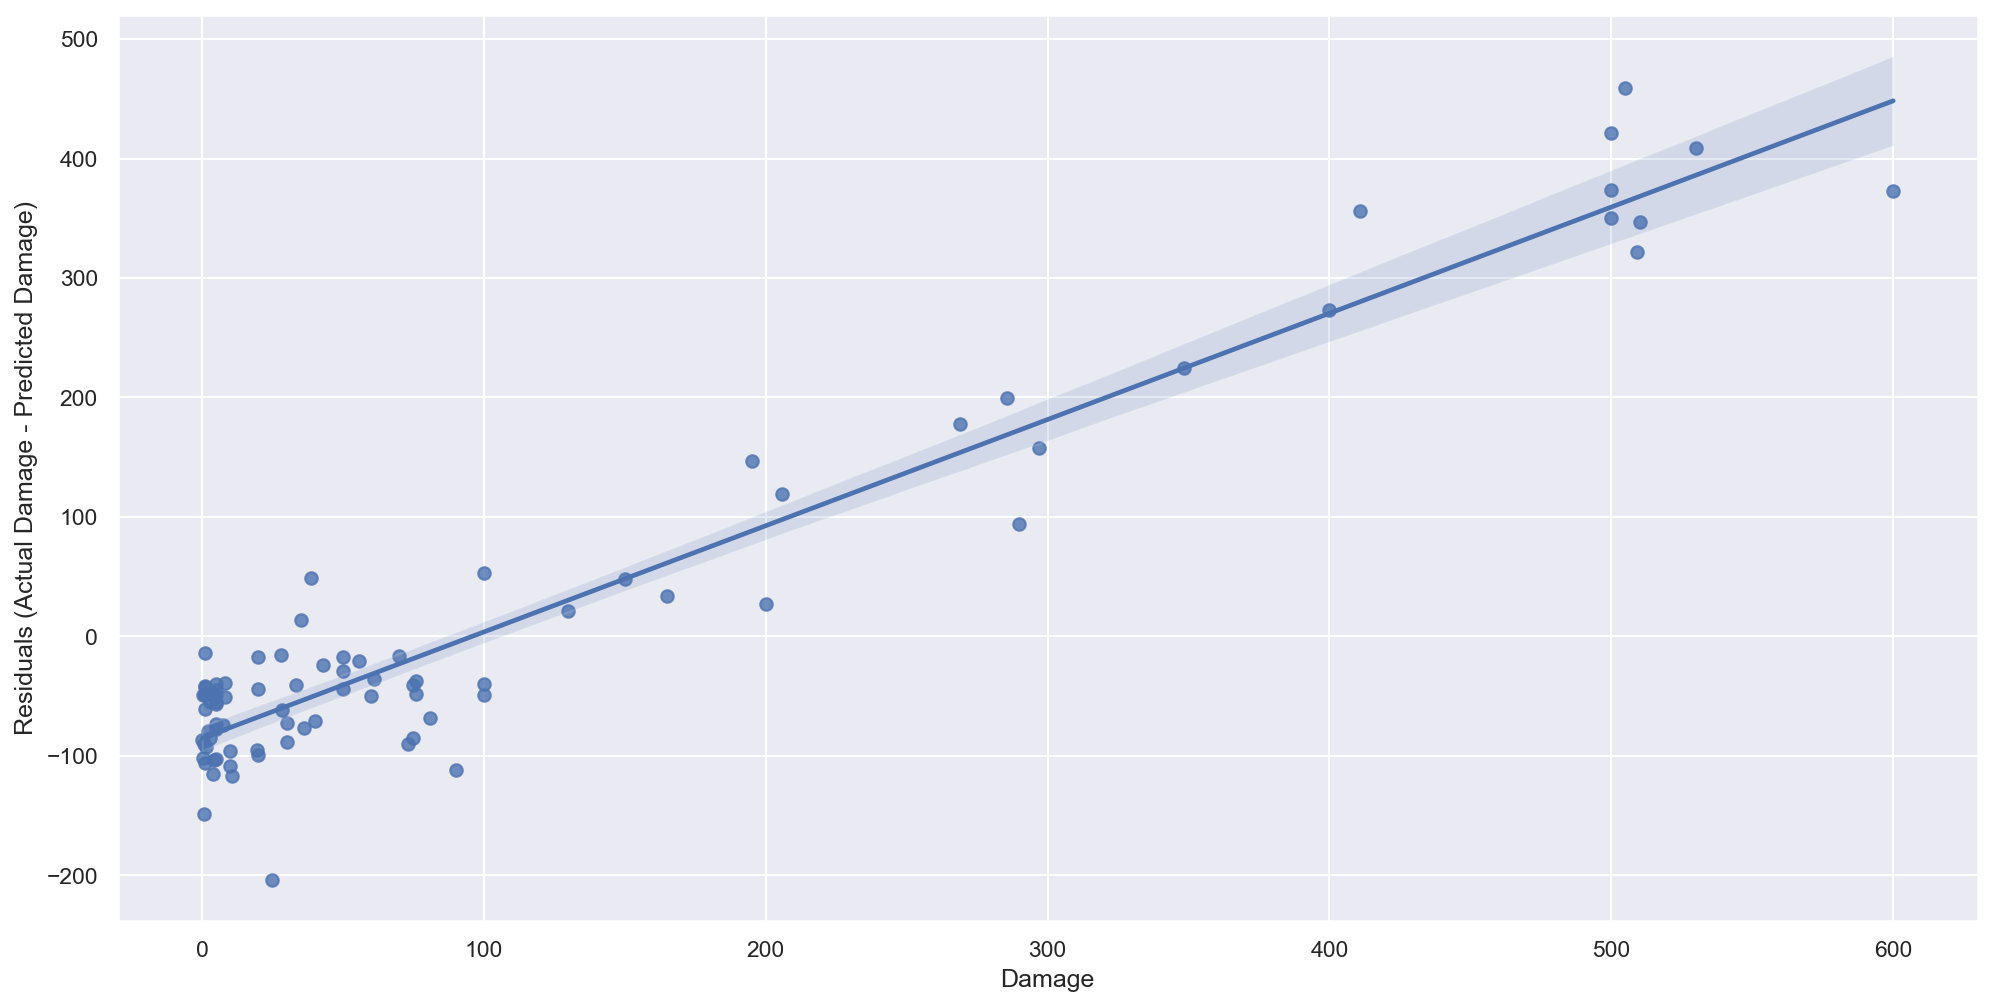

In [539]:
residuals = y_test - y_predicted
ax = sns.regplot(x=y_test, y=residuals)
ax.set_xlabel('Damage')
ax.set_ylabel('Residuals (Actual Damage - Predicted Damage)')

In [540]:
from sklearn.metrics import r2_score
r2_score(y_test, y_predicted)

0.13500146616756603